# Task 5: Sales Prediction Using Python

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading dataset
df = pd.read_csv('Advertising.csv')

In [5]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 5)

In [8]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## Plotting Graphs

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

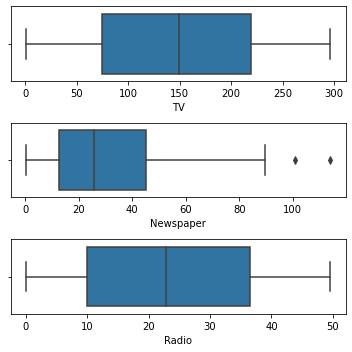

In [13]:
fig, axs = plt.subplots(3, figsize =(5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

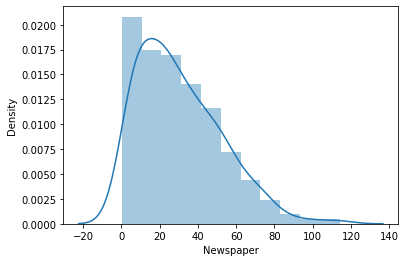

In [14]:
sns.distplot(df['Newspaper'])

In [15]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [16]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [17]:
data = df.copy()

In [18]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

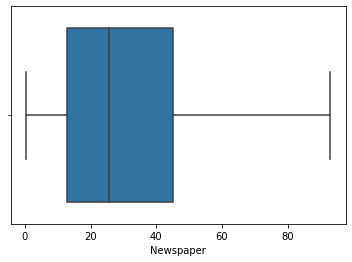

In [19]:
sns.boxplot(data['Newspaper'])

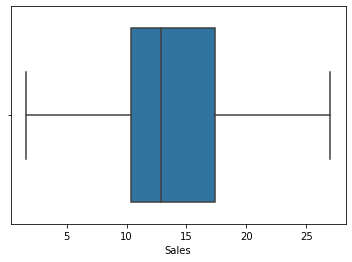

In [20]:
sns.boxplot(data['Sales']);

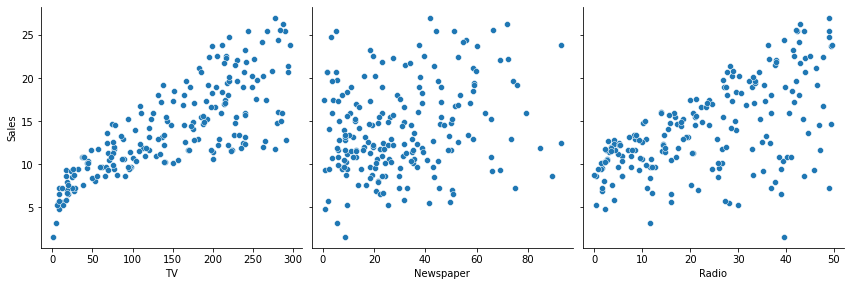

In [21]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

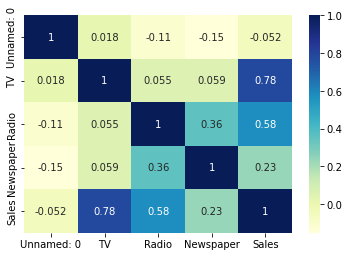

In [22]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [23]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [24]:
print(important_features)

['TV', 'Radio', 'Sales']


In [25]:
x = data['TV']
y = data['Sales']

In [26]:
x = x.values.reshape(-1,1)

In [27]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [28]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [29]:
print(x.shape,y.shape)

(200, 1) (200,)


## Training and Testing 

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [31]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [32]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [33]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [34]:
knn_train_pred = knn.predict(x_train)

In [35]:
knn_test_pred = knn.predict(x_test)

In [36]:
print(knn_train_pred, knn_test_pred)

[17.22  9.88 15.48 19.74  8.4  18.32 13.24  8.2  16.4  16.64 12.98 19.74
 13.42  8.64 16.98  5.92 16.4  17.44  9.9  17.44  8.64 11.36  4.48  9.66
 21.3  13.22  9.92  6.32 17.46 19.74 19.74 14.58 12.36 15.14 11.76 13.28
 17.42 16.98 17.22 19.74  5.92 13.94 15.98 13.28  7.24 20.34  9.72  6.04
 17.42 16.1  16.64 13.22  5.12  9.66 14.54 14.7   8.64 17.44  9.88  6.56
 13.22 18.54 13.28 15.14 11.06 18.54 11.7  18.54  8.18  9.88  8.66 17.8
 17.18 11.1  13.   12.38 18.24  7.02 19.06 10.2  13.28 13.22 16.62 13.42
 12.38 16.62 12.36  9.9  12.92  7.24 20.54 10.04 17.44  7.02  9.78 16.4
 16.18  6.56  9.7  11.7  10.04 15.14 12.56  7.24 11.7  11.76  4.48 14.76
 11.32  8.64  9.78 21.3  12.18 15.14 12.86 15.82 10.04  6.32 14.96 13.28
 18.32 21.3  11.42 15.82  7.02 11.36 16.4  16.4  11.32 14.54 21.6  16.88
 15.98 16.1 ] [13.36 15.58 13.04 17.32 17.4  14.58 10.2  15.82 17.4  18.24 14.96 13.
 13.72 15.02 20.38  5.92 17.44 11.36 11.32 16.4  12.98 12.36  7.02 11.36
 15.82 17.44 14.7  17.44 14.96 14.7  12.3

In [37]:
Results = pd.DataFrame(columns=['Model','Train R2','Test R2', 'Test RMSE','Variance'])

In [38]:
r2 = r2_score(y_test, knn_test_pred)
r2_train = r2_score(y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))
variance = r2_train - r2
Results = Results.append({'Model':'K-Nearest Neighbors','Train R2':r2_train, 'Test R2':r2, 'Test RMSE': rmse,'Variance':variance},ignore_index=True)
print('R2:',r2)
print('RMSE:',rmse)

R2: 0.46362492794587695
RMSE: 3.743699353378266


In [39]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.661778,0.463625,3.743699,0.198153


In [40]:
svr = SVR().fit(x_train, y_train)
svr

SVR()

In [41]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [42]:
print(svr_train_pred, svr_test_pred)

[16.91428043 10.19540479 16.84176409 16.48484068  7.98630598 16.30209774
 13.12741936  7.93756143 15.02408275 16.57873975 12.27790366 16.96149733
 16.61342779  7.78174496 16.73836366  7.28022434 14.89513662 16.90668248
  8.71152604 16.87963439  7.85593216 10.59957063  7.16242802  9.44835614
 16.29747991 12.77138369  8.38500006  7.30005984 16.50378288 16.95806523
 16.9592818  13.96491428 11.23741734 15.94246288 11.52223436 13.5463348
 16.87185675 16.76068531 16.89848092 16.95841358  7.29332849 16.64972889
 15.50446719 13.62039374  7.56196287 16.32835321 10.01841599  7.37384366
 16.86675966 14.57008803 16.59107412 12.73694491  7.23264561  9.52320122
 13.86660258 16.56808757  7.83501046 16.87963439 10.06421936  7.41505417
 12.74987198 15.86469007 13.5380983  15.94246288 11.84022473 15.78530876
 10.50518942 15.86469007  7.9071023  10.18403001  8.11971185 16.67234671
 16.17755615 10.27483332 13.33153349 12.60679868 16.43506411  7.62143214
 16.39131781  8.79878496 13.53397942 12.86129757 16.

In [43]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.40974353074317793
RMSE: 3.9272364443638006


In [44]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.661778,0.463625,3.743699,0.198153
1,Support Vector Machine,0.598124,0.409744,3.927236,0.188380


In [45]:
import statsmodels.api as sm

In [46]:
x_train_constant = sm.add_constant(x_train)

In [47]:
model = sm.OLS(y_train, x_train_constant).fit()

In [48]:
model.params

const    7.111400
x1       0.043979
dtype: float64

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     213.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           2.39e-29
Time:                        17:59:07   Log-Likelihood:                -343.43
No. Observations:                 134   AIC:                             690.9
Df Residuals:                     132   BIC:                             696.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1114      0.502     14.175      0.0

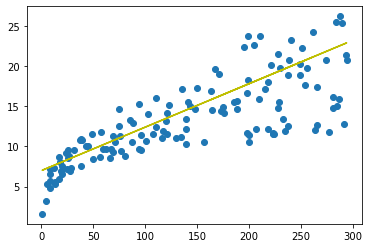

In [50]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [51]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

61     5.596999
18     1.145283
165   -5.524375
169   -4.614508
91    -1.069187
         ...   
185    6.472993
188   -3.789272
193    5.152974
154    0.229424
95     2.606899
Name: Sales, Length: 134, dtype: float64

In [52]:
y_train_pred

array([18.60300093, 10.15471746, 17.42437523, 19.61450806,  8.36918748,
       16.3820831 , 12.80222743,  8.32081105, 14.83843526, 19.45618521,
       11.94024743, 18.14562379, 16.89223452,  8.15809034, 17.15170809,
        7.4544332 , 14.69770383, 17.66185951,  9.00687675, 17.55191309,
        8.23725176, 10.47136317,  7.14218535,  9.58299603, 19.89597092,
       12.43280743,  8.73420961,  7.49401391, 19.58372306, 18.27316165,
       18.05326879, 13.69499242, 10.99470816, 15.89831882, 11.24098816,
       13.24641099, 18.77451736, 17.20448238, 18.67336664, 18.03567737,
        7.48082034, 16.96260024, 15.37497382, 13.32557242,  7.89861677,
       19.85199235, 10.01838389,  7.62594963, 18.79210879, 14.34587526,
       19.43419592, 12.39762457,  7.34888463,  9.64016818, 13.58944384,
       16.80867524,  8.21526248, 17.55191309, 10.05356674,  7.69191748,
       12.41081814, 15.80156596, 13.23761528, 15.89831882, 11.52684887,
       15.70481311, 10.3965996 , 15.80156596,  8.29002605, 10.14

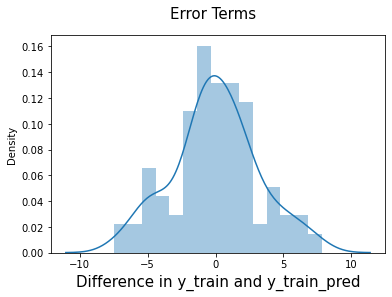

In [53]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

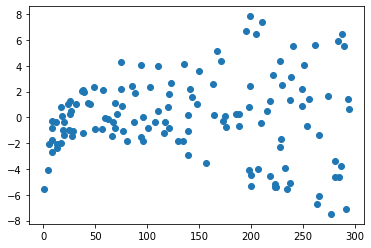

In [54]:
plt.scatter(x_train, res)
plt.show()

In [55]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [56]:
y_pred

array([12.876991  , 14.8956074 , 12.63950671, 16.01706096, 16.55359953,
       13.69939027,  9.06844675, 16.64595452, 16.49642738, 16.6283631 ,
       15.24303811, 12.90337814, 13.17604528, 16.08742667, 17.8069888 ,
        7.43244391, 17.63547237, 10.47136317, 11.39931101, 14.59655312,
       11.94024743, 11.08706316,  7.93379962, 10.55052459, 16.68553524,
       17.65746166, 16.79987952, 17.67065523, 15.06272597, 16.77789024,
       11.05627816, 10.46696531, 15.39696311, 10.1195346 ,  7.86783177,
       19.48697021, 16.50082524, 18.66457093, 10.09314746, 14.30189669,
       15.1418874 ,  9.0024789 , 10.33942745,  9.46425389, 16.21056667,
       13.77415384, 13.28159385, 12.076581  , 10.43178245, 14.51739169,
       15.51570525, 14.8956074 , 14.39425169, 18.84928093, 15.60806025,
       16.37768524, 19.28906664, 20.14664877, 11.71155887, 15.63004954,
       17.04176166, 17.74102094, 13.10128171, 11.38611744, 17.67065523,
       17.23086952])

## Accuracy of model

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.5678754948192863

In [59]:
r2 = r2_score(y_test, y_pred)
r2

0.5128238280694551

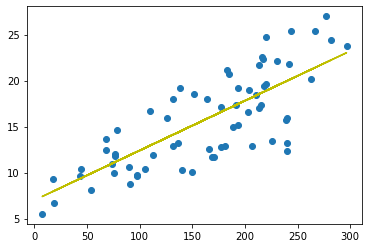

In [60]:
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test, 'y')
plt.show()